<h3>Importing Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


<h3>Importing Data</h3>

In [2]:
df = pd.read_csv("../input/practical2-dataset/Practical-3/Linear Regression - Sheet1.csv")

<h3>Analysing Data</h3>

In [3]:
df.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


In [4]:
df.shape

(300, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       300 non-null    int64  
 1   Y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,300.0,150.500000,86.746758,1.000000,75.750000,150.500000,225.250000,300.000000
Y,300.0,102.215556,57.842711,1.888889,52.388889,102.222222,152.055556,201.888889


<h3>Handling Missing Values</h3>

In [7]:
df.isna().sum()

X    0
Y    0
dtype: int64

<AxesSubplot:>

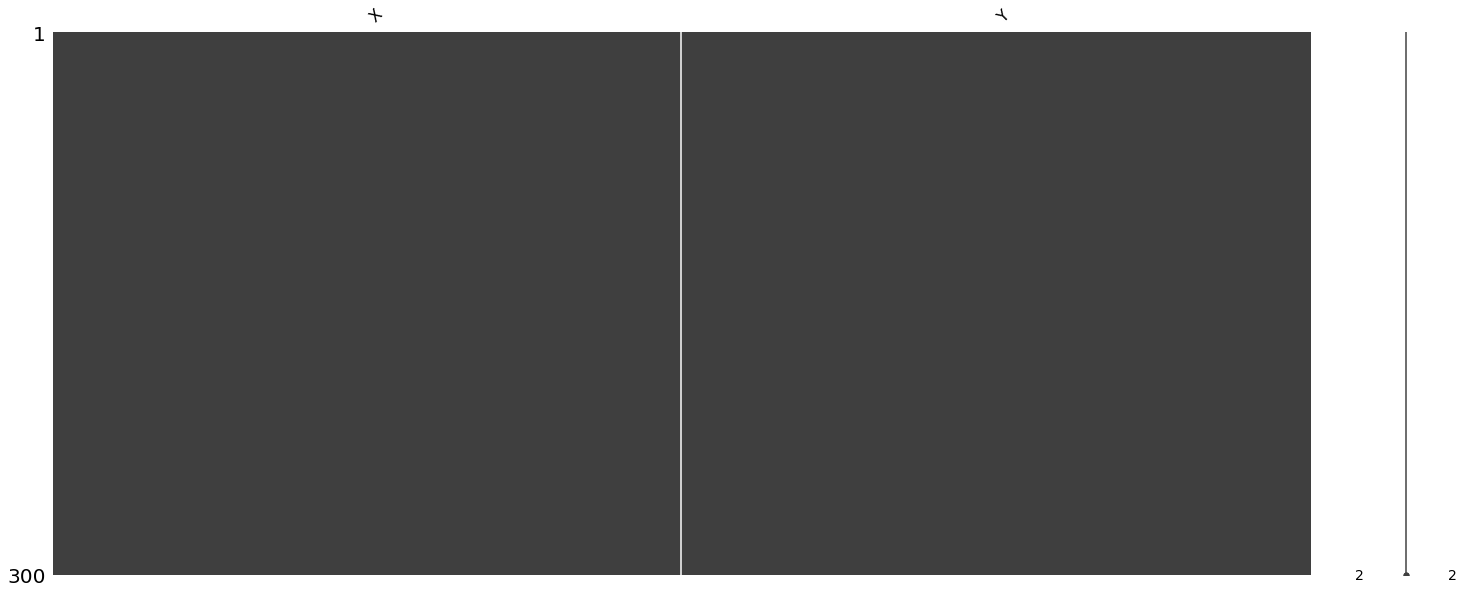

In [8]:
msno.matrix(df)

<h3>Data Visualization</h3>

Visualizing the linear correlations between variables using Heatmap Visualization.

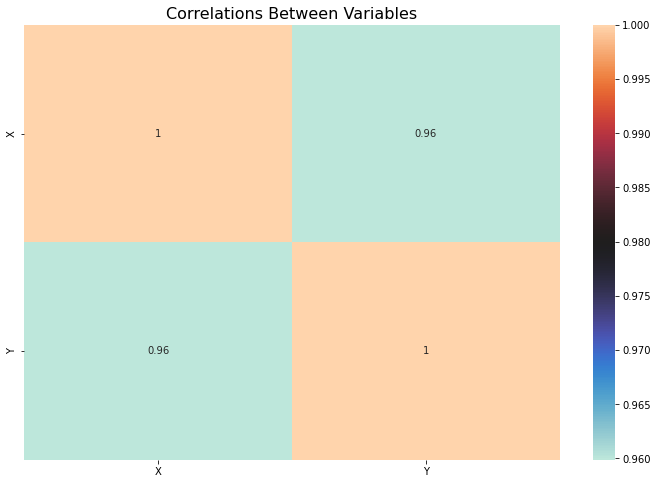

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="icefire")
plt.title("Correlations Between Variables", size=16)
plt.show()

<h3>Distribute Data into labels and features</h3>

In [10]:
X = np.array(df.iloc[:, 0:1])[:-3,:]
y = np.array(df.iloc[:,-1])[:-3]

In [11]:
# X = np.array(df.iloc[:, 0:1])
# y = np.array(df.iloc[:,-1])

<h3>Splitting Dataset into Training Set and Test Set</h3>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<h3>Feature Scaling (Normalization)</h3>

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[ 0.29054198],
       [ 0.37252744],
       [-1.04464977],
       [-0.09596089],
       [-1.46628926],
       [ 0.52478614],
       [ 1.19238202],
       [-0.31849285],
       [-0.29506844],
       [-0.84554223],
       [-0.07253648],
       [ 1.13382098],
       [ 0.67704485],
       [ 1.66087035],
       [ 0.78245473],
       [ 1.35635293],
       [ 0.14999548],
       [-1.29060614],
       [-0.70499573],
       [-0.16623414],
       [-0.97437652],
       [ 0.10314665],
       [ 1.69600697],
       [-0.3887661 ],
       [-1.43115264],
       [-1.33745497],
       [ 0.7473181 ],
       [-1.48971368],
       [-1.02122535],
       [-0.79869339],
       [-0.22479519],
       [ 0.02116119],
       [ 0.1734199 ],
       [ 1.27436747],
       [-0.40047831],
       [ 0.34910302],
       [-1.63026018],
       [-0.55273702],
       [ 1.50861164],
       [-0.96266431],
       [-0.89239106],
       [-0.1076731 ],
       [ 0.59505939],
       [ 0.26711756],
       [ 1.55546047],
       [-1

<h3>Simple Linear Regression</h3>

Fitting Simple Linear Regression to the Training set

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

<h3>Polynomial Linear Regression</h3>

Fitting Polynomial Linear Regression to the Training set

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 16)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

<h3>Visualising the training set results</h3>
Simple Linear Regression

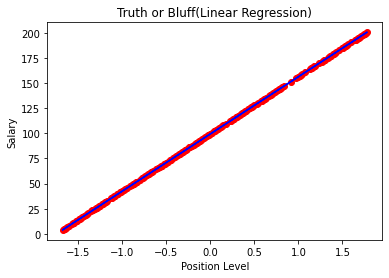

In [17]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Truth or Bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Polynomial Linear Regression (Smooth Curve)

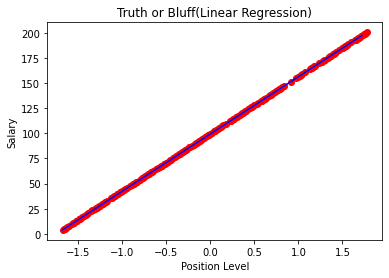

In [18]:
X_grid = np.arange(min(X_train), max(X_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

<h3>Visualising the test set results</h3>
Simple Linear Regression

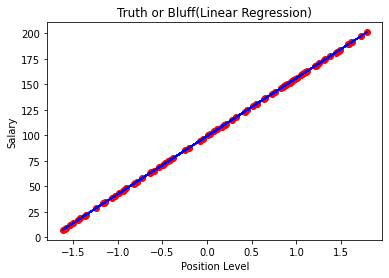

In [19]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, lin_reg.predict(X_test), color = 'blue')
plt.title('Truth or Bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

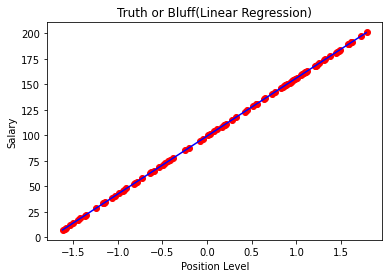

In [20]:
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

<h3>Prediction</h3>

In [21]:
y_pred = lin_reg.predict(X_test)


In [22]:
# y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
# y_pred

<h3>Error</h3>

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error

print("Squared: ", mean_squared_error(y_test, y_pred))
print("Absolute: ", mean_absolute_error(y_test, y_pred))
print("Max: ", max_error(y_test, y_pred))
print("Median: ", median_absolute_error(y_test, y_pred))


Squared:  4.547701388913135e-16
Absolute:  1.473684324200993e-08
Max:  3.766702150187484e-08
Median:  4.2344012740613834e-09


<h3>Deviance</h3>

In [24]:
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_tweedie_deviance

print("Mean Gamma Deviance: ", mean_gamma_deviance(y_test, y_pred))
print("Mean Poisson Deviance: ", mean_poisson_deviance(y_test, y_pred))
print("Mean Tweedie Deviance: ", mean_tweedie_deviance(y_test, y_pred))

Mean Gamma Deviance:  -5.674473236973022e-17
Mean Poisson Deviance:  5.131697536045168e-16
Mean Tweedie Deviance:  4.547701388913135e-16
